# Step 1:
- Mount Google Drive
- import libraries
- import packages
- set up the working directory





In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import (precision_score, confusion_matrix, ConfusionMatrixDisplay,
                             mean_squared_error, accuracy_score, roc_auc_score,
                             roc_curve, recall_score, f1_score)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
working_directory = "/content/drive/MyDrive/Colab Notebooks/data"


# Step 2: Define Feature Extraction Function
- Purpose: Define a function to filter and visualize features based on a correlation threshold.
- Explanation: This function calculates the correlation matrix of the input DataFrame, identifies highly correlated features, separates them into selected and excluded features, and visualizes the correlation matrices.
Cell


## Explaintion
- The correlation matrix help to unterstand how each feature relates to every other feature in the data set. The values ranging from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation and
0 indicates no correlation.
- identifying highly correlated festures through the upper triangular matrix of the correlation matrix (excluding the diagonal) to find pairs of features with a correlation higher than a specified threshold (0.9 by default). These highly correlated features are marked for exclusion.
- filtering selected and excluded features in two list, where
  - selected_features: Features with correlation below the threshold.
  - excluded_features: Features with correlation above the threshold


In [4]:
#for better understanding I added the code from /Depression_Level_Classifier/feature_extraction.py instead of just calling it.

def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS

    Filter features based on correlation threshold and visualize the correlation matrices.

    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.

    ************************************************************************

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.

    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """

    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    # print lists of selected/excluded features
    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

#Step 3: Load the data set and show feature of the data
- Load datasets from CSV files.
- Print the shape of the dataset and select specific columns
- Apply the extractor function to filter and visualize the selected features that were selected in the previous step
  - correlation matrix of selected features visualized in heatmaps and shows the features that are not highly correlated with each other
    - helps helps in identifying features that are not redundant and can provide unique information for model building
  - correlation matrix matrix of excluded featrues visualized in heatmaps and show the features that are highly correlated with at least one other feature
    - These features are considered redundant because they provide similar information, and including all of them might not improve the model's performance but can increase computational complexity.
  - list of selected and excluted features
    - Displays the correlation matrix of features that are not highly correlated (correlation < 0.9)
    - Displays the correlation matrix of features that are highly correlated (correlation > 0.9).




(640, 65)


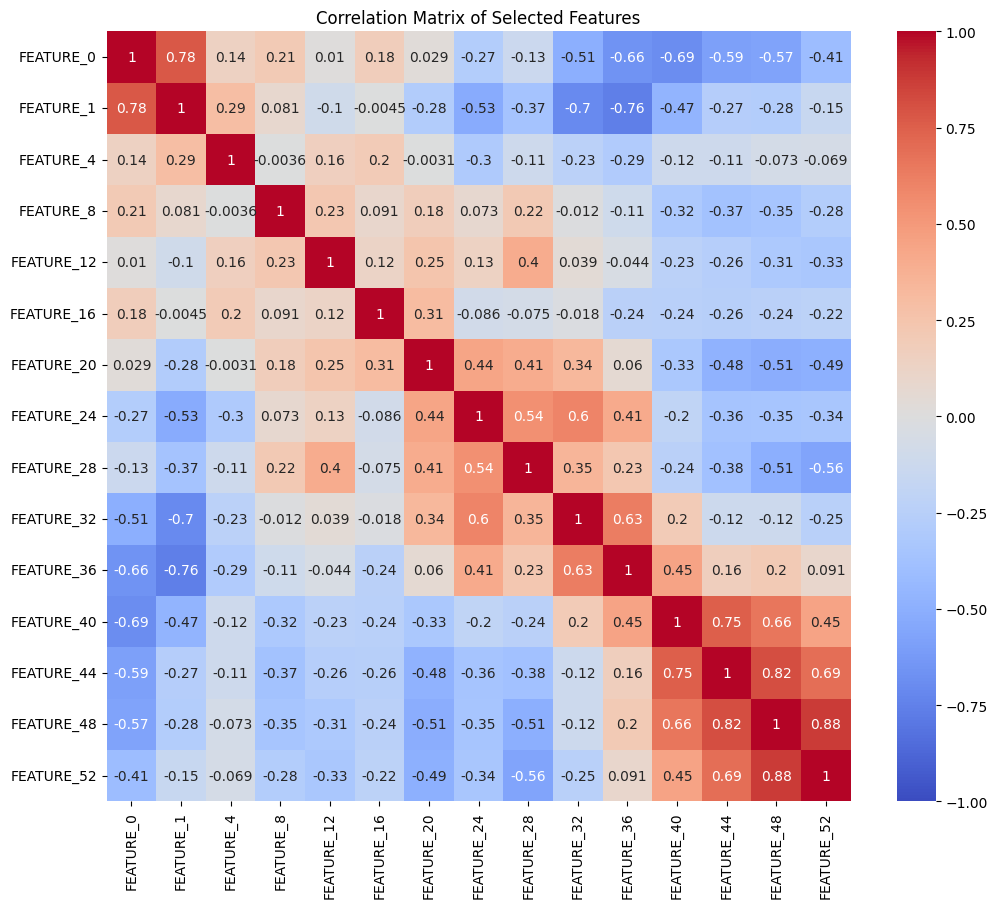

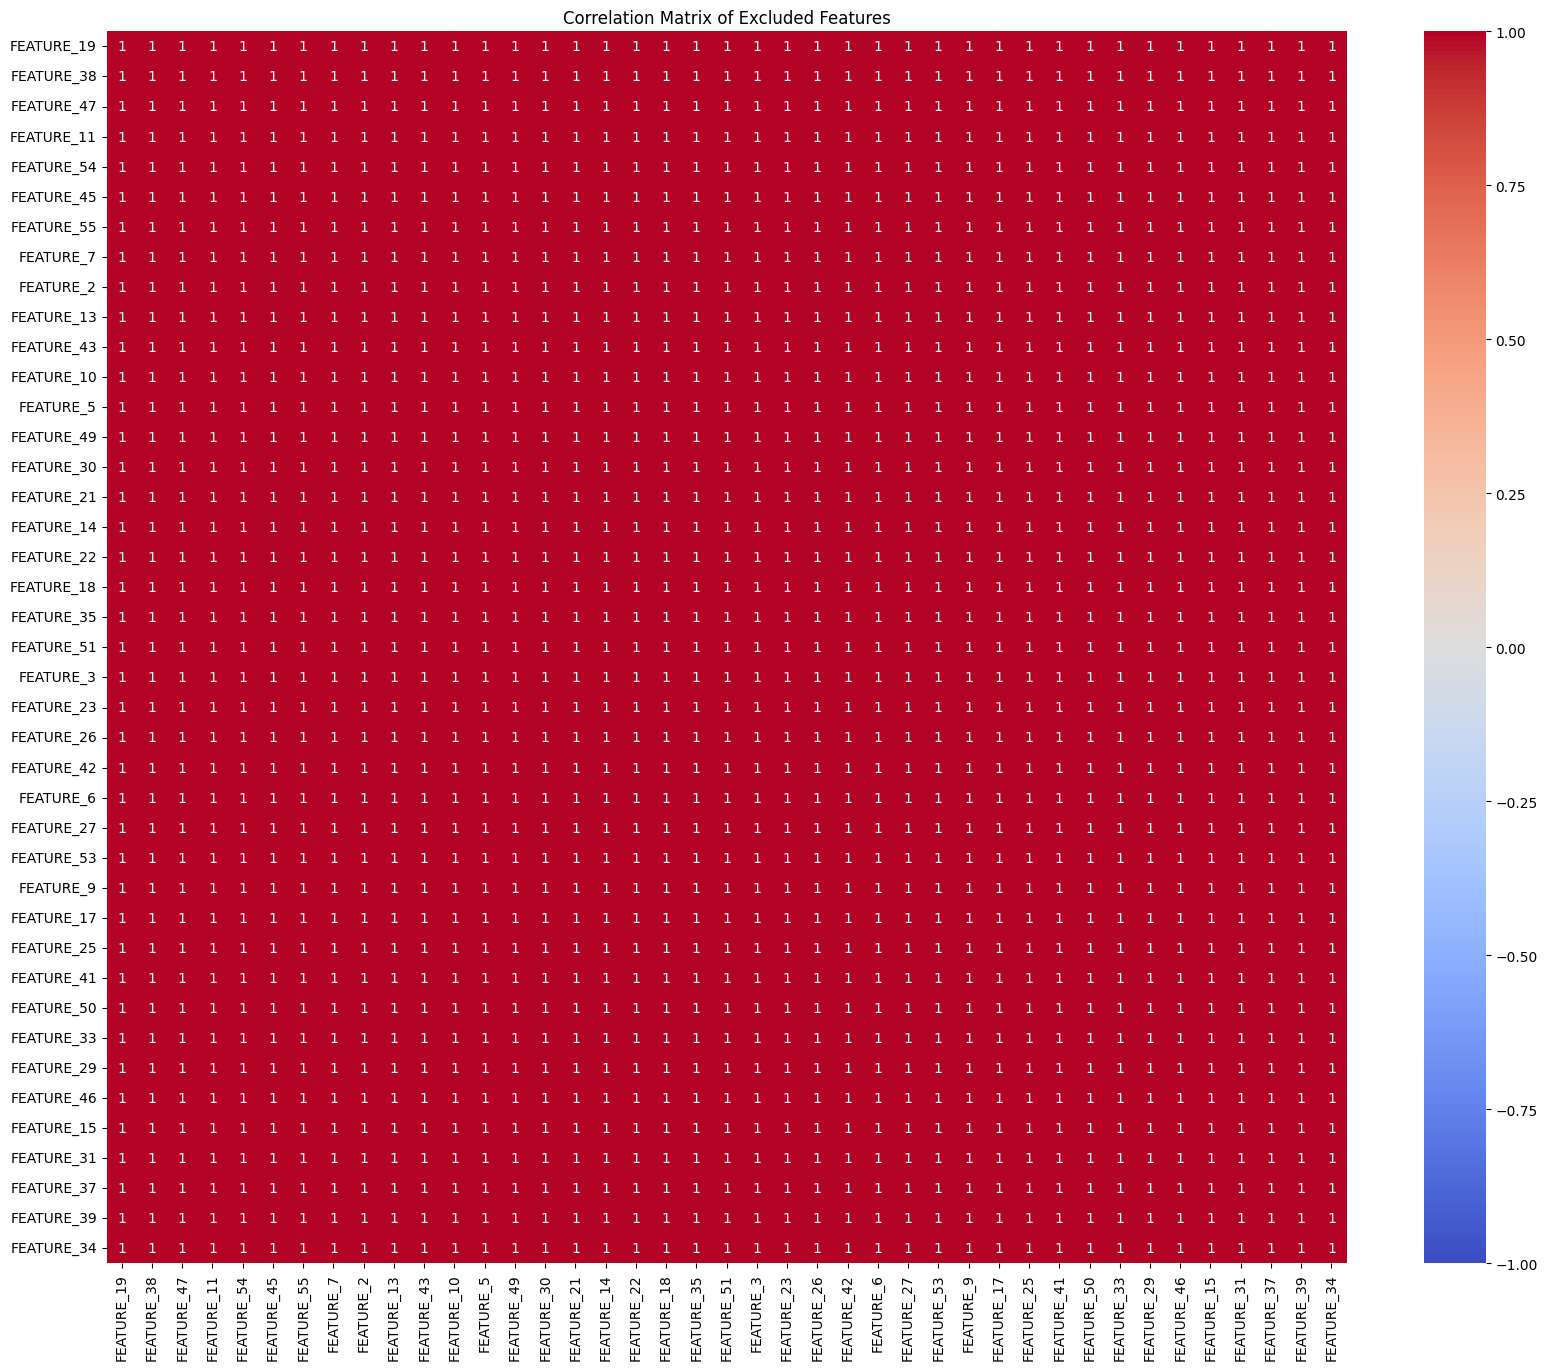

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_19', 'FEATURE_38', 'FEATURE_47', 'FEATURE_11', 'FEATURE_54', 'FEATURE_45', 'FEATURE_55', 'FEATURE_7', 'FEATURE_2', 'FEATURE_13', 'FEATURE_43', 'FEATURE_10', 'FEATURE_5', 'FEATURE_49', 'FEATURE_30', 'FEATURE_21', 'FEATURE_14', 'FEATURE_22', 'FEATURE_18', 'FEATURE_35', 'FEATURE_51', 'FEATURE_3', 'FEATURE_23', 'FEATURE_26', 'FEATURE_42', 'FEATURE_6', 'FEATURE_27', 'FEATURE_53', 'FEATURE_9', 'FEATURE_17', 'FEATURE_25', 'FEATURE_41', 'FEATURE_50', 'FEATURE_33', 'FEATURE_29', 'FEATURE_46', 'FEATURE_15', 'FEATURE_31', 'FEATURE_37', 'FEATURE_39', 'FEATURE_34']


(['FEATURE_0',
  'FEATURE_1',
  'FEATURE_4',
  'FEATURE_8',
  'FEATURE_12',
  'FEATURE_16',
  'FEATURE_20',
  'FEATURE_24',
  'FEATURE_28',
  'FEATURE_32',
  'FEATURE_36',
  'FEATURE_40',
  'FEATURE_44',
  'FEATURE_48',
  'FEATURE_52'],
 ['FEATURE_19',
  'FEATURE_38',
  'FEATURE_47',
  'FEATURE_11',
  'FEATURE_54',
  'FEATURE_45',
  'FEATURE_55',
  'FEATURE_7',
  'FEATURE_2',
  'FEATURE_13',
  'FEATURE_43',
  'FEATURE_10',
  'FEATURE_5',
  'FEATURE_49',
  'FEATURE_30',
  'FEATURE_21',
  'FEATURE_14',
  'FEATURE_22',
  'FEATURE_18',
  'FEATURE_35',
  'FEATURE_51',
  'FEATURE_3',
  'FEATURE_23',
  'FEATURE_26',
  'FEATURE_42',
  'FEATURE_6',
  'FEATURE_27',
  'FEATURE_53',
  'FEATURE_9',
  'FEATURE_17',
  'FEATURE_25',
  'FEATURE_41',
  'FEATURE_50',
  'FEATURE_33',
  'FEATURE_29',
  'FEATURE_46',
  'FEATURE_15',
  'FEATURE_31',
  'FEATURE_37',
  'FEATURE_39',
  'FEATURE_34'])

In [5]:
# Load the different datasets always activate only one and change title results accordingly

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv')
# data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv')


#keep track which threshold and version to save results correctly.
title_results = "TH2_BP_PHQ_2"
#title_results = "TH17_MH_PHQ_S"

print(data.shape)
columns_with_features = [col for col in data.columns if "FEATURE" in col]

extractor(data[columns_with_features])

# Step 4: Explanation of Defining Data and Target for the Training Process
- Define Features (X)
 - line selects the columns that are identified as important features for the model
 - The DataFrame data1 contains all the data, and by specifying the column names in double square brackets, you are creating a new DataFrame X that includes only the selected feature columns. These columns were identified previously as the selected features that are not highly correlated.

- Define Target Variable (y)
  - line selects the target variable
  - The column 'Depression' from the DataFrame data is assigned to the variable y. This column represents the labels or outcomes that correspond to each row of features in X.

- Print First Few Rows of Features: Prints the first few rows of X to check the data.
- Print Shape of Features: Prints the dimensions of X to understand the dataset size.

In [6]:
# Define Data and Target for the training process

X = data[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]
y = data['Depression']
print(X.head)
print(X.shape)

<bound method NDFrame.head of      FEATURE_0  FEATURE_1  FEATURE_4  FEATURE_8  FEATURE_12  FEATURE_16  \
0     6.769834  -0.319559  -0.280888  -0.212718    0.223368    0.208923   
1     4.855263  -0.438780  -0.438823  -0.333889   -0.302499    0.588967   
2     4.786821  -0.436577  -0.347784  -0.230345   -0.179782    0.689279   
3     4.185324  -0.432203  -0.425526   0.056293   -0.279408    0.908803   
4     4.789679  -0.450950  -0.439212  -0.353679    0.050581    0.808610   
..         ...        ...        ...        ...         ...         ...   
635   4.924071  -0.407955  -0.372306  -0.399525    0.041994    0.210757   
636   5.851797  -0.383768  -0.383739  -0.338778   -0.287039    0.667006   
637   3.579501  -0.421611  -0.401714  -0.376635   -0.235264   -0.002617   
638   4.991720  -0.423239  -0.422916  -0.129807    0.068608   -0.225763   
639   4.151211  -0.424411  -0.285593  -0.411741   -0.107482    0.100864   

     FEATURE_20  FEATURE_24  FEATURE_28  FEATURE_32  FEATURE_36  FEAT

# Step 5: Training and Evaluating a Decision Tree Classifier with Precision and Confusion Matrix Analysis

- Split the Data: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data. Split the dataset into training (80%) and testing (20%) sets.
- Train the Model: Instantiate and training data a Decision Tree classifier with a specified maximum depth here with a maximum depth of 7.



- Evaluate on Training Data: Make predictions on the training data and compute the precision score and confusion matrix to assess model performance.
  - Predict on the Training Data: Make predictions on the training data using the trained classifier.
  - Calculate Precision Score: Compute and print the precision score for the training data to evaluate the model's performance, which is the ratio of true positive predictions to the sum of true positive and false positive predictions. It measures the accuracy of positive predictions.
  - Compute and Display the Confusion Matrix for Training Data: Evaluates and visualizes the classifier's performance on the training data using a confusion matrix. This function computes the confusion matrix, which is a table used to describe the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

- Evaluate on Test Data: Make predictions on the test data and compute the precision score and confusion matrix to assess how well the model generalizes to new data.
  - Predict on the Test Data: Uses the trained decision tree classifier to make predictions on the test data.
  - Calculate the Precision Score for Test Data: Compute and print the precision score for the test data to evaluate the model's performance, which is the ratio of true positive predictions to the sum of true positive and false positive predictions. It measures the accuracy of positive predictions.
  - Compute and Display the Confusion Matrix for Test Data: Evaluates and visualizes the classifier's performance on the test data using a confusion matrix. This function computes the confusion matrix, which is a table used to describe the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).






Precision Score on training data: 0.9493670886075949


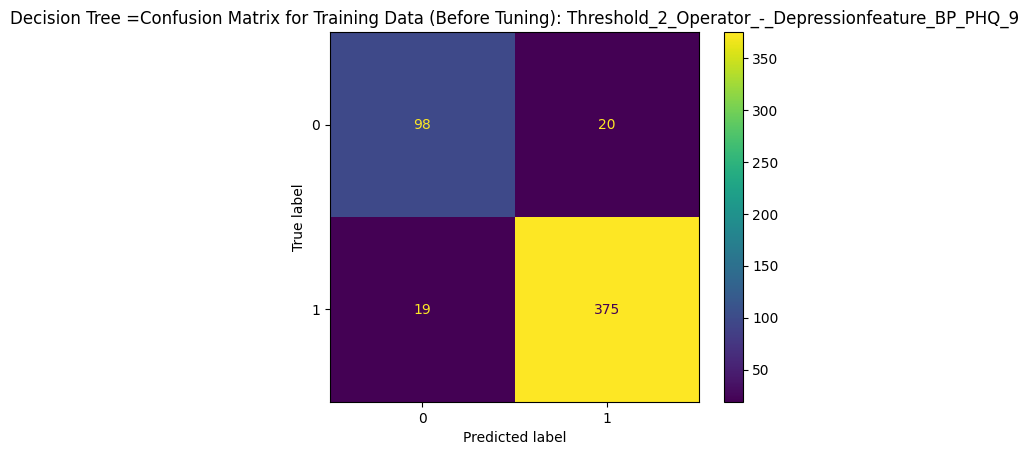

Precision Score on test data: 0.8210526315789474


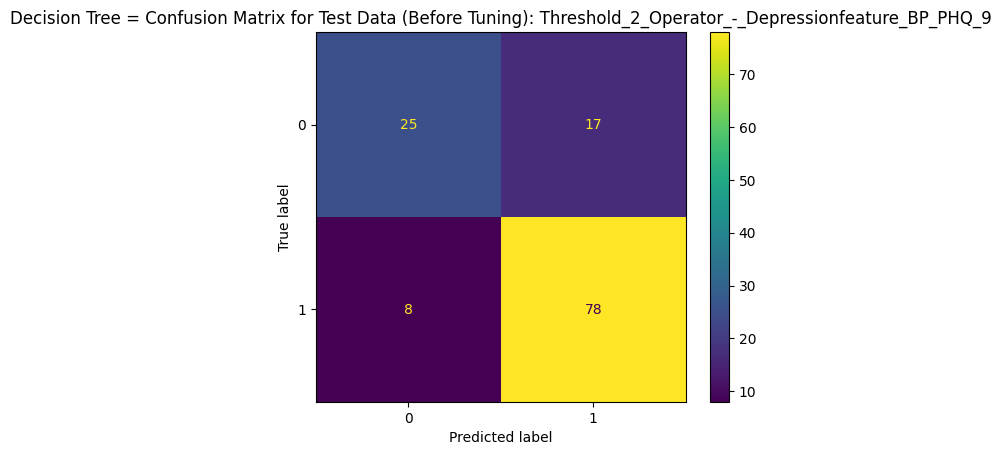

In [7]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=14)

# Instantiate and fit the DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=7, random_state=14)
DTC.fit(train_X, train_y)

# Predict on the training data
pred_y_train = DTC.predict(train_X)

# Calculate the precision score for training data
precision_train = precision_score(train_y, pred_y_train)
print(f"Precision Score on training data: {precision_train}")

# Compute and display the confusion matrix for training data
cm_train = confusion_matrix(train_y, pred_y_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Decision Tree =Confusion Matrix for Training Data (Before Tuning): Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9')
plt.show()

# Predict on the test data
pred_y_test = DTC.predict(test_X)

# Calculate the precision score for test data
precision_test = precision_score(test_y, pred_y_test)
print(f"Precision Score on test data: {precision_test}")

# Compute and display the confusion matrix for test data
cm_test = confusion_matrix(test_y, pred_y_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Decision Tree = Confusion Matrix for Test Data (Before Tuning): Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9')
plt.show()


# Step 6: Hyperparameter Tuning of a Decision Tree Classifier Using RandomizedSearchCV and Cross-Validation
- Import Necessary Libraries: Import functions and classes needed for data splitting, hyperparameter tuning, and cross-validation.
- Define Parameter Distribution: Specify the range of hyperparameters to search over.
- Define Cross-Validation Strategy: Set up the cross-validation method to evaluate model performance.
- Setup RandomizedSearchCV: Configure the randomized search for hyperparameter tuning with cross-validation.
- Fit the Model: Perform the hyperparameter tuning process and fit the model to the training data.
- Get Best Parameters and Score: Retrieve and print the best hyperparameters and the best score achieved during the tuning process.



In [8]:
# Define the parameter distribution
param_dist = {
    'max_depth': range(2, 30, 5),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2),
    'criterion': ['gini', 'entropy']
}

# Create the DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=14)

# Define the cross-validation strategy
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=14)

# Setup the RandomizedSearchCV and use crossvalidation
rand_search = RandomizedSearchCV(DTC,
                                 param_distributions=param_dist,
                                 n_iter=15,
                                 cv=crossvalidation,
                                 scoring='roc_auc',
                                 random_state=14)

# Fit the model on the training data
hptun = rand_search.fit(train_X, train_y)

# Get the best parameters and score
best_params = hptun.best_params_
best_score = hptun.best_score_
print(best_params)
print(best_score)

{'min_samples_split': 12, 'min_samples_leaf': 15, 'max_depth': 12, 'criterion': 'entropy'}
0.7668235263348663


# Step 7: Training a Decision Tree Classifier and Evaluating Its Performance Using Precision Score and Confusion Matrix
- Best Parameters from Hyperparameter Tuning: Define the best hyperparameters obtained from hyperparameter tuning.
- Create the Decision Tree Classifier: Instantiate the classifier with specific hyperparameters.


- Fit the Model on the Training Data: Train the classifier using the training data.
- Make Predictions on the Training Data: Generate predictions for the training data.
- Calculate the Precision Score: Compute and print the precision score to evaluate the model's accuracy in predicting positive outcomes,  which is the ratio of true positive predictions to the sum of true positive and false positive predictions. It measures the accuracy of positive predictions.
- Generate and Display the Confusion Matrix: Visualize the classifier's performance using a confusion matrix to understand the distribution of true/false positives and negatives.


- Make Predictions on the Test Data: Generate predictions for the test data.
- Calculate the Precision Score: Compute and print the precision score to evaluate the model's accuracy in predicting positive outcomes, which measure how well the model performs on unseen data.
- Calculate the Mean Squared Error: Compute and print the mean squared error to assess the overall prediction error, calculates the average squared difference between the actual and predicted values, indicating the model's prediction error.
- Generate and Display the Confusion Matrix: Visualize the classifier's performance using a confusion matrix, which show the distribution of true/false positives and negatives.


- Extract True Negative, False Positive, False Negative, and True Positive: Extract components of the confusion matrix.
- Calculate Accuracy, Precision, Recall, False Negative Rate, and F1 Score: Compute various evaluation metrics.
- Print the Calculated Metrics: Display the computed metrics for a comprehensive assessment of the classifier's performance.
  - Accuracy: Measures the overall correctness of the model. High accuracy is desired but can be misleading in imbalanced datasets.
  - Precision: Measures the accuracy of positive predictions. High precision means fewer false positives.
  - Recall: Measures the ability to identify positive instances. High recall means fewer false negatives.
  - F1 Score: Balances precision and recall, providing a single metric that considers both. Useful in scenarios with imbalanced datasets or when both false positives and false negatives are important.



Precision Score on training data: 0.8891566265060241


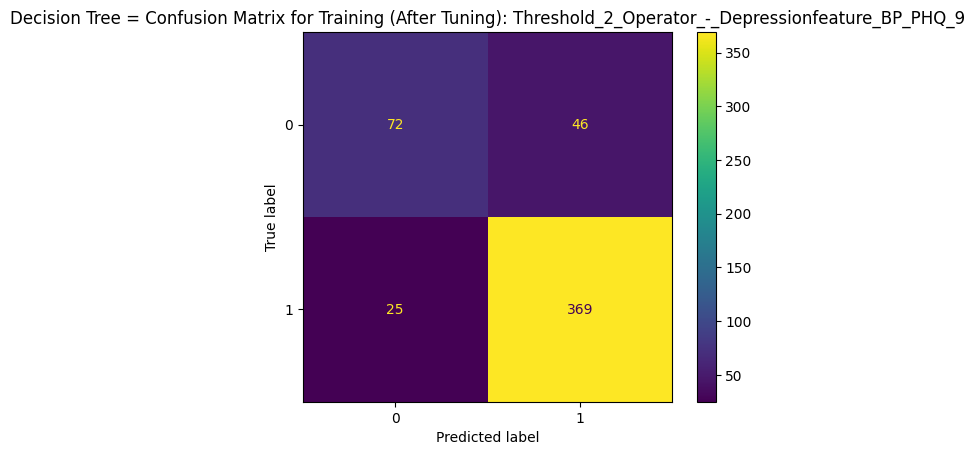

Precision Score on test data: 0.7894736842105263
Mean Squared Error: 0.2421875


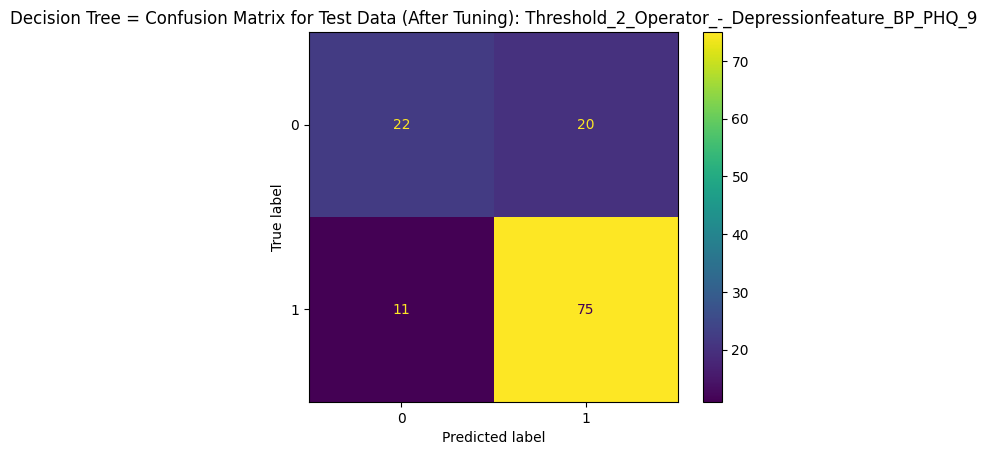

Accuracy: 0.7578125
Precision: 0.7894736842105263
Recall: 0.872093023255814
F1 Score: 0.8287292817679558


In [9]:
# Create the Decision Tree classifier with the best parameters
DT = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
DT.fit(train_X, train_y)

# Make predictions on the training data
pred_y_train = DT.predict(train_X)

# Calculate the precision score for training data
precision_train = precision_score(train_y, pred_y_train)
print(f"Precision Score on training data: {precision_train}")

# Generate and display the confusion matrix for training data
cm_train = confusion_matrix(train_y, pred_y_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Decision Tree = Confusion Matrix for Training (After Tuning): Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9')
plt.show()

# Make predictions on the test data
pred_y_test = DT.predict(test_X)

# Calculate the precision score for test data
precision_test = precision_score(test_y, pred_y_test)
print(f"Precision Score on test data: {precision_test}")

# Calculate the Mean Squared Error for test data
mse = mean_squared_error(test_y, pred_y_test)
print(f"Mean Squared Error: {mse}")

# Generate and display the confusion matrix for test data
cm_test = confusion_matrix(test_y, pred_y_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Decision Tree = Confusion Matrix for Test Data (After Tuning): Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9')
plt.show()

# Extract True Negative, False Positive, False Negative, and True Positive
TN, FP, FN, TP = cm_test.ravel()

# Calculate accuracy, recall, false negative rate, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision_test * recall) / (precision_test + recall)

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

#Step 8: Evaluating a Decision Tree Classifier Using ROC Curve and AUC Score
- Calculate Predicted Probabilities: Obtain the predicted probabilities for the positive class from the model.

- Calculate the AUC Value: Compute the AUC score to evaluate the classifier's performance, which is the area under the Receiver Operating Characteristic (ROC) curve. A higher AUC value indicates better model performance.

- Calculate the ROC Curve: Obtain the false positive rates, true positive rates, and thresholds for plotting the ROC curve.

- Plot the ROC Curve: Visualize the ROC curve to understand the classifier's performance across different thresholds, including the AUC value for reference.

In this case, the ROC curve indicates the performance of the classifier, with an AUC value of 0.78. Although this AUC value suggests that the classifier has a moderate ability to distinguish between the positive and negative classes, there is room for improvement to achieve better discrimination.

AUC Value: 0.7772702104097453


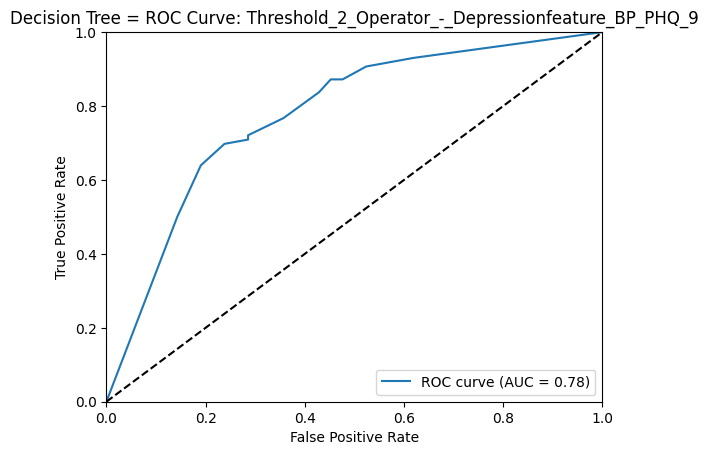

In [10]:
# Calculate Predicted Probabilities
y_pred_proba = DT.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_y, y_pred_proba)
print(f"AUC Value: {auc_value}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree = ROC Curve: Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9')
plt.legend(loc='lower right')
plt.show()

# Evaluate Different Thresholds and Plot ROC Curve
- Custom Thresholds: Evaluate the model at different thresholds by converting predicted probabilities to binary predictions based on these thresholds. Calculate:
  - accuracy
  - precision
  - recall
  - F1-score
  - ROC AUC.
- Display Metrics: Print the metrics and confusion matrices for each threshold. Store metrics in a DataFrame and plot them.
- ROC Curve: Plot the ROC curve using the predicted probabilities from the best model and display the AUC value.

Threshold results:

| Threshold | Accuracy | Precision | Recall  | F1-score | ROC AUC |
|-----------|----------|-----------|---------|----------|---------|
| 0.4       | 0.757812 | 0.789474  | 0.872093| 0.828729 | 0.777270|
| 0.5       | 0.757812 | 0.789474  | 0.872093| 0.828729 | 0.777270|
| 0.6       | 0.750000 | 0.800000  | 0.837209| 0.818182 | 0.777270|
| 0.7       | 0.750000 | 0.800000  | 0.837209| 0.818182 | 0.777270|
| 0.8       | 0.718750 | 0.837838  | 0.720930| 0.775000 | 0.777270|
| 0.9       | 0.695312 | 0.873016  | 0.639535| 0.738255 | 0.777270|

- The highest accuracy is at thresholds 0.4 and 0.5 (0.757812)
- The highest precision is at threshold 0.9 (0.873016).
- The highest recall is at thresholds 0.4 and 0.5 (0.872093).
- The highest F1-score is at thresholds 0.4 and 0.5 (0.828729).
- All thresholds have the same ROC AUC of 0.777270.


Balanced performance with high accuracy, recall, and F1-score, the thresholds 0.4 and 0.5 are the best choices.

Threshold = 0.4
Accuracy: 0.7578, Precision: 0.7895, Recall: 0.8721, F1-score: 0.8287, ROC AUC: 0.7773
Confusion Matrix:
[[22 20]
 [11 75]]


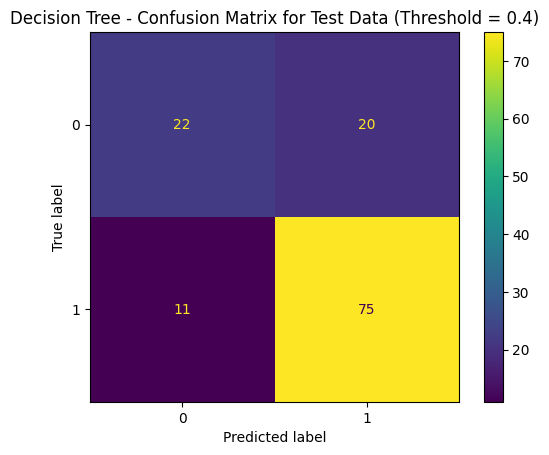

Threshold = 0.5
Accuracy: 0.7578, Precision: 0.7895, Recall: 0.8721, F1-score: 0.8287, ROC AUC: 0.7773
Confusion Matrix:
[[22 20]
 [11 75]]


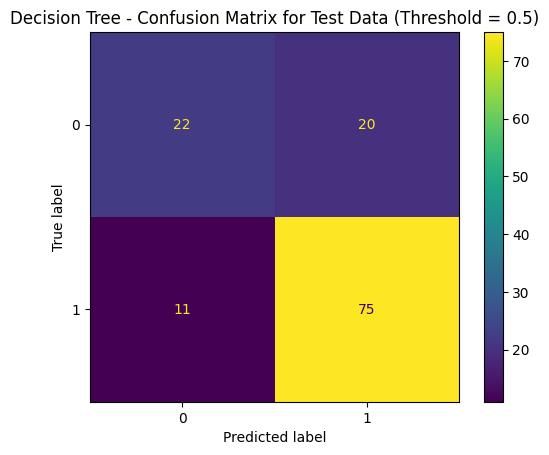

Threshold = 0.6
Accuracy: 0.7500, Precision: 0.8000, Recall: 0.8372, F1-score: 0.8182, ROC AUC: 0.7773
Confusion Matrix:
[[24 18]
 [14 72]]


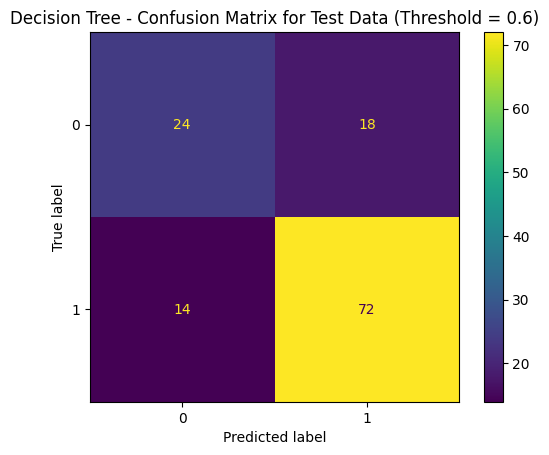

Threshold = 0.7
Accuracy: 0.7500, Precision: 0.8000, Recall: 0.8372, F1-score: 0.8182, ROC AUC: 0.7773
Confusion Matrix:
[[24 18]
 [14 72]]


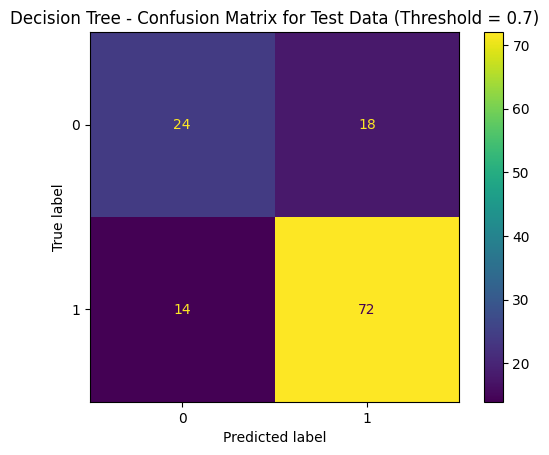

Threshold = 0.8
Accuracy: 0.7188, Precision: 0.8378, Recall: 0.7209, F1-score: 0.7750, ROC AUC: 0.7773
Confusion Matrix:
[[30 12]
 [24 62]]


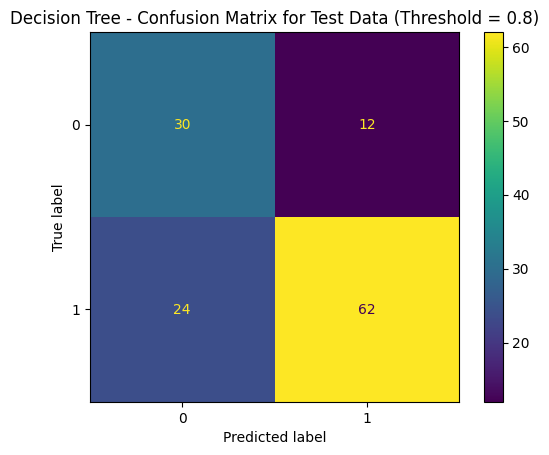

Threshold = 0.9
Accuracy: 0.6953, Precision: 0.8730, Recall: 0.6395, F1-score: 0.7383, ROC AUC: 0.7773
Confusion Matrix:
[[34  8]
 [31 55]]


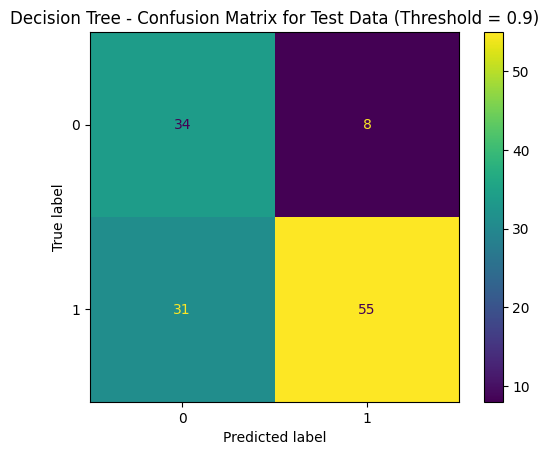

   Threshold  Accuracy  Precision    Recall  F1-score  ROC AUC
0        0.4  0.757812   0.789474  0.872093  0.828729  0.77727
1        0.5  0.757812   0.789474  0.872093  0.828729  0.77727
2        0.6  0.750000   0.800000  0.837209  0.818182  0.77727
3        0.7  0.750000   0.800000  0.837209  0.818182  0.77727
4        0.8  0.718750   0.837838  0.720930  0.775000  0.77727
5        0.9  0.695312   0.873016  0.639535  0.738255  0.77727


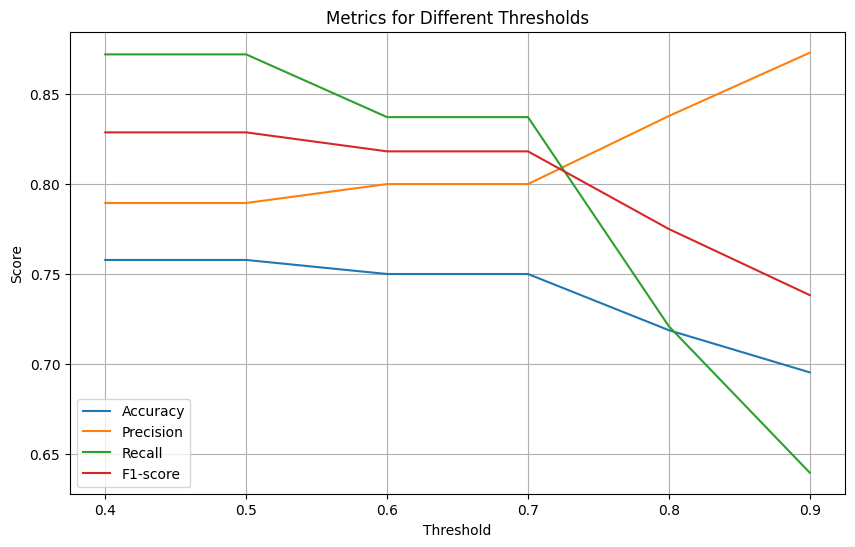

Best Threshold based on F1-score: 0.4


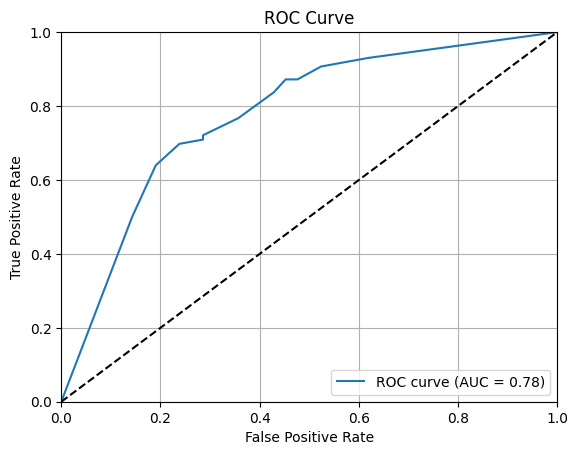

In [11]:
# Use custom thresholds to make predictions and calculate metrics
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_pred_proba = DT.predict_proba(test_X)[:, 1]

metrics_dict = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC AUC': []
}

roc_auc = roc_auc_score(test_y, y_pred_proba)

for threshold in thresholds:
    pred_y_test_custom = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics using imported functions
    accuracy = accuracy_score(test_y, pred_y_test_custom)
    precision = precision_score(test_y, pred_y_test_custom)
    recall = recall_score(test_y, pred_y_test_custom)
    f1 = f1_score(test_y, pred_y_test_custom)

    metrics_dict['Threshold'].append(threshold)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-score'].append(f1)
    metrics_dict['ROC AUC'].append(roc_auc)

    print(f"Threshold = {threshold}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    cm_test_custom = confusion_matrix(test_y, pred_y_test_custom)
    print(cm_test_custom)

    disp_test_custom = ConfusionMatrixDisplay(confusion_matrix=cm_test_custom)
    disp_test_custom.plot()
    plt.title(f'Decision Tree - Confusion Matrix for Test Data (Threshold = {threshold})')
    plt.show()

metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1-score'], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics for Different Thresholds')
plt.legend()
plt.grid()
plt.show()

best_threshold = metrics_df.loc[metrics_df['F1-score'].idxmax(), 'Threshold']
print(f"Best Threshold based on F1-score: {best_threshold}")

# Plot the ROC curve for the best model
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Step 9: Evaluating the Second Dataset with Detailed Steps

1. Load Data: Load the second dataset into a DataFrame to prepare for analysis and modeling.

2. Define Features and Target:
Identify and select the relevant features (independent variables) and the target variable (dependent variable) for the model.

3. Split Data: Divide the second dataset into training and testing sets to evaluate the model's performance on unseen data. Typically, 80% of the data is used for training and 20% for testing.

4. Define Parameter Distribution: Specify the hyperparameters and their respective ranges for hyperparameter tuning. This helps in finding the best combination of parameters for the model.

5. Create Classifier: Instantiate the Decision Tree classifier using the best hyperparameters obtained from the hyperparameter tuning process.

6. Cross-Validation Strategy:Define a cross-validation strategy (e.g., K-fold cross-validation) to ensure robust model evaluation during the hyperparameter tuning process.

7. Hyperparameter Tuning: Perform RandomizedSearchCV to find the optimal hyperparameters for the classifier. This involves training multiple models with different parameter combinations and selecting the best one based on a scoring metric.

8. Fit Model: Train the Decision Tree classifier using the training data from the second dataset with the best-found hyperparameters.

9. Make Predictions: Generate predictions for both the training and test data using the trained classifier.

10. Evaluate the Model:
- Precision Score: Compute and print the precision score to evaluate the model's accuracy in predicting positive outcomes.
- Mean Squared Error: Compute and print the mean squared error to assess the overall prediction error.
- Calculate Metrics: Extract and compute additional evaluation metrics such as accuracy, recall, false negative rate, and F1 score.

11. Visualize Performance:
- Confusion Matrix: Generate and display the confusion matrices for both the training and test data to visualize the distribution of true/false positives and negatives.
- AUC and ROC Curve: Compute the Area Under the Curve (AUC) and plot the Receiver Operating Characteristic (ROC) curve to evaluate the classifier's performance. Save the plot for further analysis.

12. Print Metrics: Display all the computed evaluation metrics for a comprehensive assessment of the classifier's performance on the second dataset.

13. Test different Thresholds

(1120, 65)


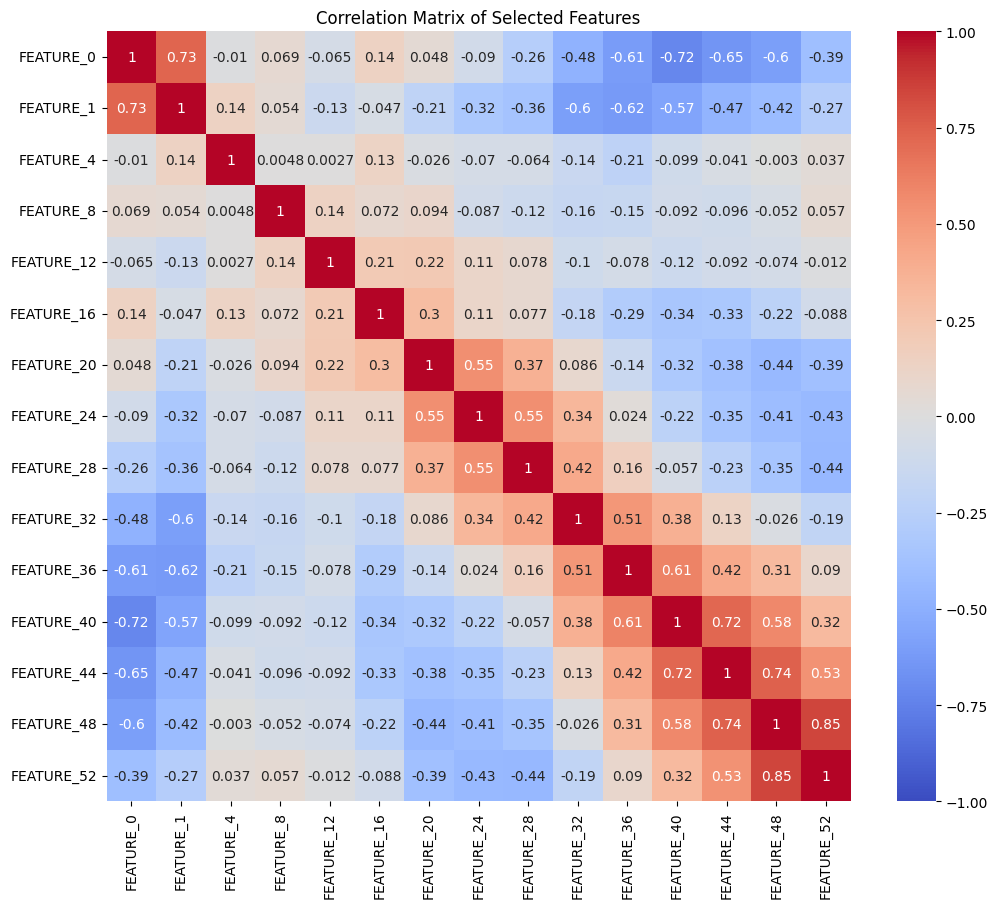

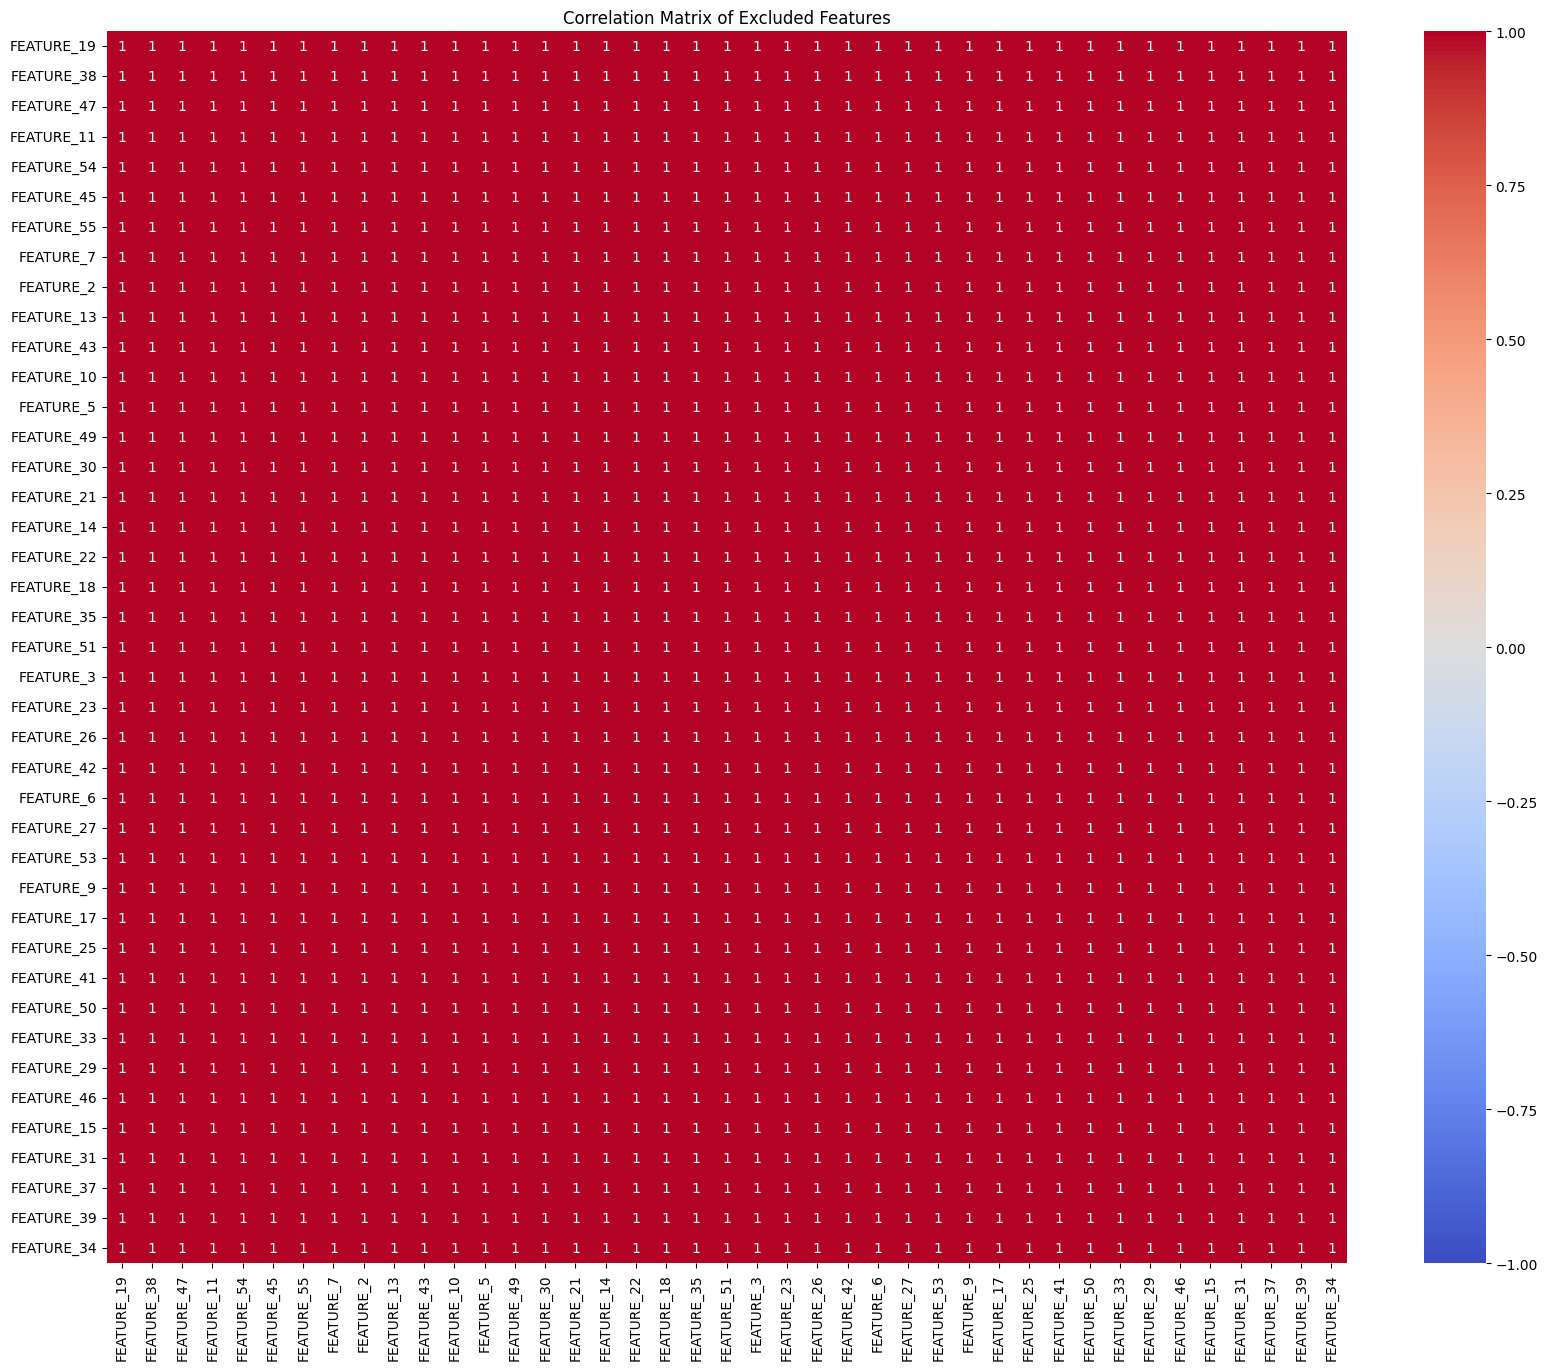

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_19', 'FEATURE_38', 'FEATURE_47', 'FEATURE_11', 'FEATURE_54', 'FEATURE_45', 'FEATURE_55', 'FEATURE_7', 'FEATURE_2', 'FEATURE_13', 'FEATURE_43', 'FEATURE_10', 'FEATURE_5', 'FEATURE_49', 'FEATURE_30', 'FEATURE_21', 'FEATURE_14', 'FEATURE_22', 'FEATURE_18', 'FEATURE_35', 'FEATURE_51', 'FEATURE_3', 'FEATURE_23', 'FEATURE_26', 'FEATURE_42', 'FEATURE_6', 'FEATURE_27', 'FEATURE_53', 'FEATURE_9', 'FEATURE_17', 'FEATURE_25', 'FEATURE_41', 'FEATURE_50', 'FEATURE_33', 'FEATURE_29', 'FEATURE_46', 'FEATURE_15', 'FEATURE_31', 'FEATURE_37', 'FEATURE_39', 'FEATURE_34']


(['FEATURE_0',
  'FEATURE_1',
  'FEATURE_4',
  'FEATURE_8',
  'FEATURE_12',
  'FEATURE_16',
  'FEATURE_20',
  'FEATURE_24',
  'FEATURE_28',
  'FEATURE_32',
  'FEATURE_36',
  'FEATURE_40',
  'FEATURE_44',
  'FEATURE_48',
  'FEATURE_52'],
 ['FEATURE_19',
  'FEATURE_38',
  'FEATURE_47',
  'FEATURE_11',
  'FEATURE_54',
  'FEATURE_45',
  'FEATURE_55',
  'FEATURE_7',
  'FEATURE_2',
  'FEATURE_13',
  'FEATURE_43',
  'FEATURE_10',
  'FEATURE_5',
  'FEATURE_49',
  'FEATURE_30',
  'FEATURE_21',
  'FEATURE_14',
  'FEATURE_22',
  'FEATURE_18',
  'FEATURE_35',
  'FEATURE_51',
  'FEATURE_3',
  'FEATURE_23',
  'FEATURE_26',
  'FEATURE_42',
  'FEATURE_6',
  'FEATURE_27',
  'FEATURE_53',
  'FEATURE_9',
  'FEATURE_17',
  'FEATURE_25',
  'FEATURE_41',
  'FEATURE_50',
  'FEATURE_33',
  'FEATURE_29',
  'FEATURE_46',
  'FEATURE_15',
  'FEATURE_31',
  'FEATURE_37',
  'FEATURE_39',
  'FEATURE_34'])

In [12]:
# Load the different datasets always activate only one and change title results accordingly

#data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Threshold_2_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv') # Remove extra space at the beginning


#keep track which threshold and version to save results correctly.
title_results = "TH14_V1"

print(data.shape)
columns_with_features = [col for col in data.columns if "FEATURE" in col]

extractor(data[columns_with_features])

In [13]:
# Define Data and Target for the training process

X = data[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]
y = data['Depression']
print(X.head)
print(X.shape)

<bound method NDFrame.head of       FEATURE_0  FEATURE_1  FEATURE_4  FEATURE_8  FEATURE_12  FEATURE_16  \
0      5.122387  -0.431154  -0.431019  -0.167048   -0.096858    1.868558   
1      4.151211  -0.424411  -0.285593  -0.411741   -0.107482    0.100864   
2      5.823771  -0.394454  -0.359670  -0.377060   -0.132813    0.687730   
3      2.063583  -0.451099  -0.433290  -0.086641   -0.199004    0.400605   
4      2.868968  -0.450982  -0.429280  -0.426662   -0.244999    0.719110   
...         ...        ...        ...        ...         ...         ...   
1115   6.402835  -0.361157  -0.339015  -0.239876    0.037329    1.565932   
1116   4.651101  -0.429621  -0.429939  -0.231465   -0.185139    0.764649   
1117   4.588921  -0.456390  -0.442728  -0.227390    0.614065    1.466453   
1118   4.651101  -0.429621  -0.429939  -0.231465   -0.185139    0.764649   
1119   6.485628  -0.339855  -0.337341  -0.311186   -0.121876    1.037260   

      FEATURE_20  FEATURE_24  FEATURE_28  FEATURE_32  FEA

Precision Score on training data: 0.8679245283018868


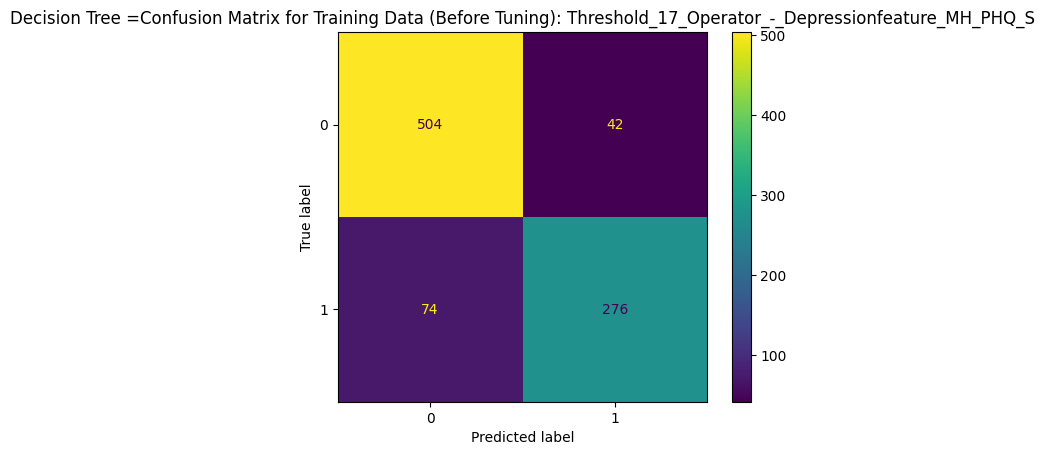

Precision Score on test data: 0.6976744186046512


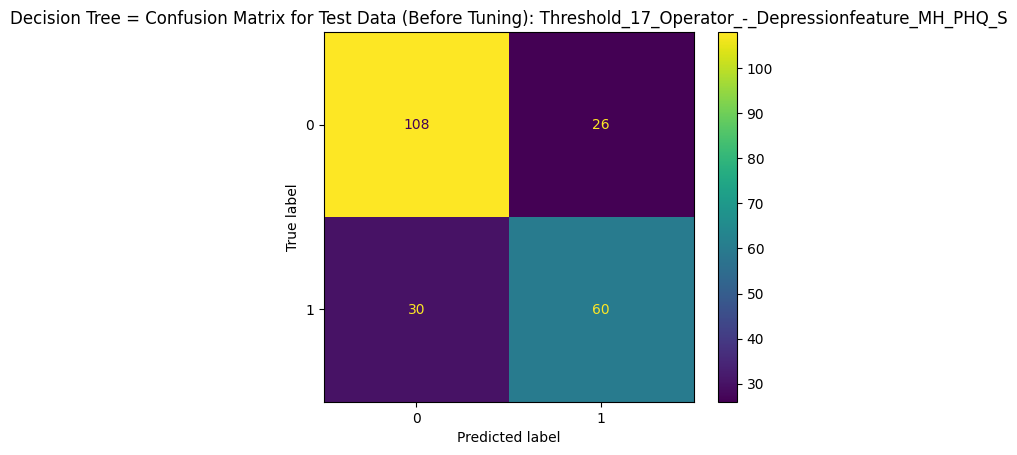

In [14]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=14)

# Instantiate and fit the DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=7, random_state=14)
DTC.fit(train_X, train_y)

# Predict on the training data
pred_y_train = DTC.predict(train_X)

# Calculate the precision score for training data
precision_train = precision_score(train_y, pred_y_train)
print(f"Precision Score on training data: {precision_train}")

# Compute and display the confusion matrix for training data
cm_train = confusion_matrix(train_y, pred_y_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Decision Tree =Confusion Matrix for Training Data (Before Tuning): Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S')
plt.show()

# Predict on the test data
pred_y_test = DTC.predict(test_X)

# Calculate the precision score for test data
precision_test = precision_score(test_y, pred_y_test)
print(f"Precision Score on test data: {precision_test}")

# Compute and display the confusion matrix for test data
cm_test = confusion_matrix(test_y, pred_y_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Decision Tree = Confusion Matrix for Test Data (Before Tuning): Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S')
plt.show()

In [15]:
# Define the parameter distribution
param_dist = {
    'max_depth': range(2, 30, 5),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 20, 2),
    'criterion': ['gini', 'entropy']
}

# Create the DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=14)

# Define the cross-validation strategy
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=14)

# Setup the RandomizedSearchCV and use crossvalidation
rand_search = RandomizedSearchCV(DTC,
                                 param_distributions=param_dist,
                                 n_iter=15,
                                 cv=crossvalidation,
                                 scoring='roc_auc',
                                 random_state=14)

# Fit the model on the training data
hptun = rand_search.fit(train_X, train_y)

# Get the best parameters and score
best_params = hptun.best_params_
best_score = hptun.best_score_
print(best_params)
print(best_score)


{'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 27, 'criterion': 'gini'}
0.6830128009977041


Precision Score on training data: 0.9135446685878963


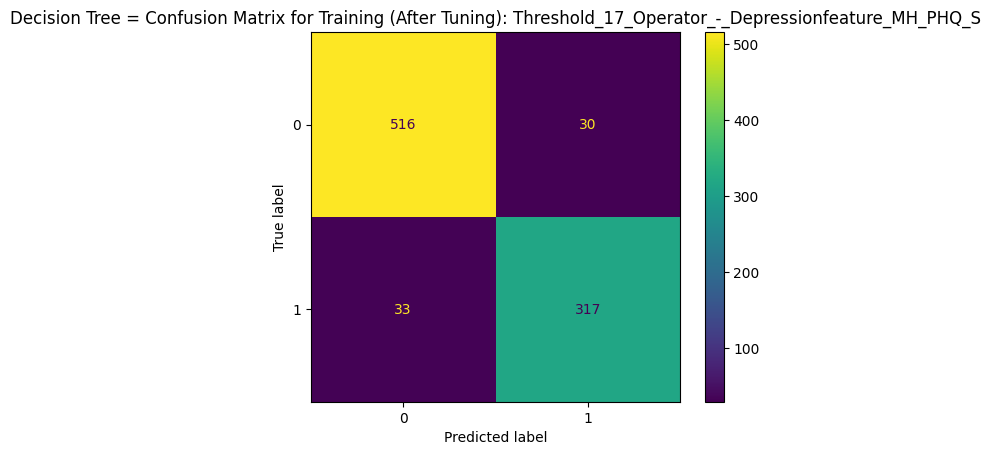

Precision Score on test data: 0.6666666666666666
Mean Squared Error: 0.2544642857142857


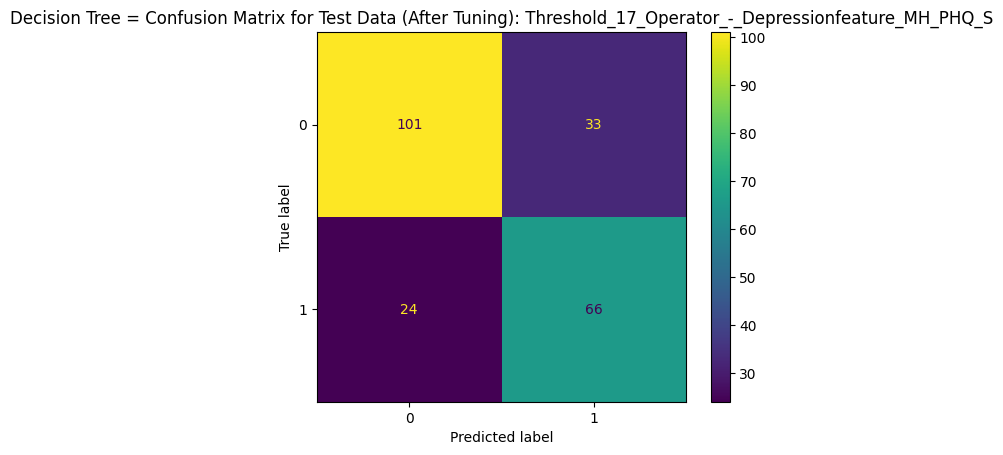

Accuracy: 0.7455357142857143
Precision: 0.6666666666666666
Recall: 0.7333333333333333
F1 Score: 0.6984126984126984


In [16]:
# Best parameters obtained from hyperparameter tuning
best_params = {'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 22, 'criterion': 'gini'}

# Create the Decision Tree classifier with the best parameters
DT = DecisionTreeClassifier(**best_params)

# Fit the model on the training data
DT.fit(train_X, train_y)

# Make predictions on the training data
pred_y_train = DT.predict(train_X)

# Calculate the precision score for training data
precision_train = precision_score(train_y, pred_y_train)
print(f"Precision Score on training data: {precision_train}")

# Generate and display the confusion matrix for training data
cm_train = confusion_matrix(train_y, pred_y_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Decision Tree = Confusion Matrix for Training (After Tuning): Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S')
plt.show()

# Make predictions on the test data
pred_y_test = DT.predict(test_X)

# Calculate the precision score for test data
precision_test = precision_score(test_y, pred_y_test)
print(f"Precision Score on test data: {precision_test}")

# Calculate the Mean Squared Error for test data
mse = mean_squared_error(test_y, pred_y_test)
print(f"Mean Squared Error: {mse}")

# Generate and display the confusion matrix for test data
cm_test = confusion_matrix(test_y, pred_y_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Decision Tree = Confusion Matrix for Test Data (After Tuning): Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S')
plt.show()

# Extract True Negative, False Positive, False Negative, and True Positive
TN, FP, FN, TP = cm_test.ravel()

# Calculate accuracy, recall, false negative rate, and F1 score
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)  # True positive rate
FNR = FN / (TP + FN)  # False negative rate
f1 = 2 * (precision_test * recall) / (precision_test + recall)  # Use precision_test for consistency

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision_test}")  # Use precision_test for consistency
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


AUC Value: 0.7735903814262023


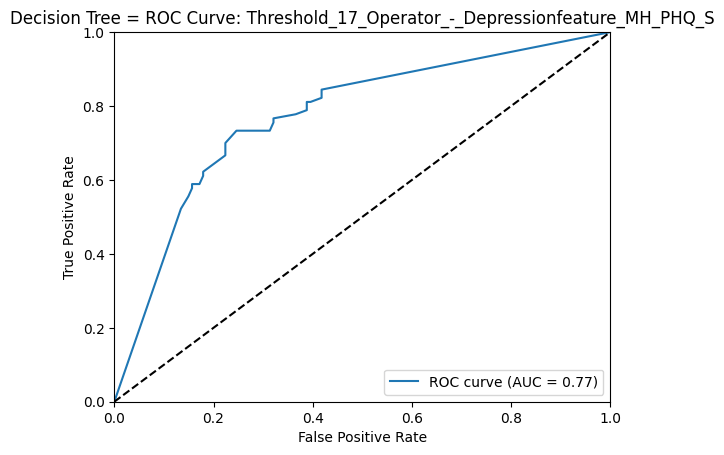

In [17]:
# Calculate Predicted Probabilities
y_pred_proba = DT.predict_proba(test_X)[:, 1]
auc_value = roc_auc_score(test_y, y_pred_proba)
print(f"AUC Value: {auc_value}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree = ROC Curve: Threshold_17_Operator_-_Depressionfeature_MH_PHQ_S')
plt.legend(loc='lower right')
plt.show()

Here is the analysis based on the provided data:

### Data Table:
| Threshold | Accuracy | Precision | Recall  | F1-score | ROC AUC |
|-----------|----------|-----------|---------|----------|---------|
| 0.4       | 0.705357 | 0.611111  | 0.733333| 0.666667 | 0.773590|
| 0.5       | 0.709821 | 0.616822  | 0.733333| 0.670051 | 0.773590|
| 0.6       | 0.745536 | 0.673684  | 0.711111| 0.691892 | 0.773590|
| 0.7       | 0.741071 | 0.700000  | 0.622222| 0.658824 | 0.773590|
| 0.8       | 0.741071 | 0.716216  | 0.588889| 0.646341 | 0.773590|
| 0.9       | 0.732143 | 0.714286  | 0.555556| 0.625000 | 0.773590|

### Analysis:
- The highest accuracy is at threshold 0.6 (0.745536).
- The highest precision is at threshold 0.8 (0.716216).
- The highest recall is at thresholds 0.4 and 0.5 (0.733333).
- The highest F1-score is at threshold 0.6 (0.691892).
- All thresholds have the same ROC AUC of 0.773590.

For balanced performance with high accuracy, recall, and F1-score, the threshold 0.6 is the best choice.

Threshold = 0.4
Accuracy: 0.7054, Precision: 0.6111, Recall: 0.7333, F1-score: 0.6667, ROC AUC: 0.7736
Confusion Matrix:
[[92 42]
 [24 66]]


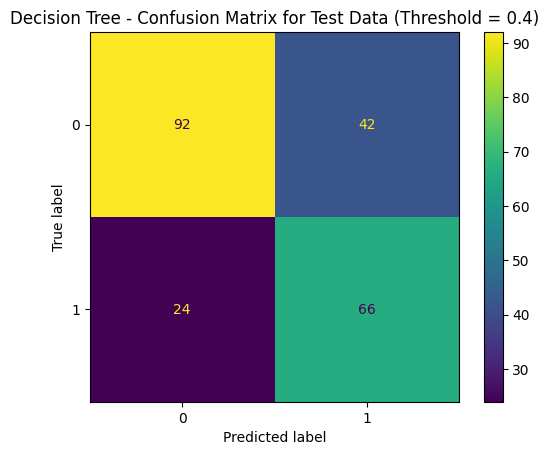

Threshold = 0.5
Accuracy: 0.7098, Precision: 0.6168, Recall: 0.7333, F1-score: 0.6701, ROC AUC: 0.7736
Confusion Matrix:
[[93 41]
 [24 66]]


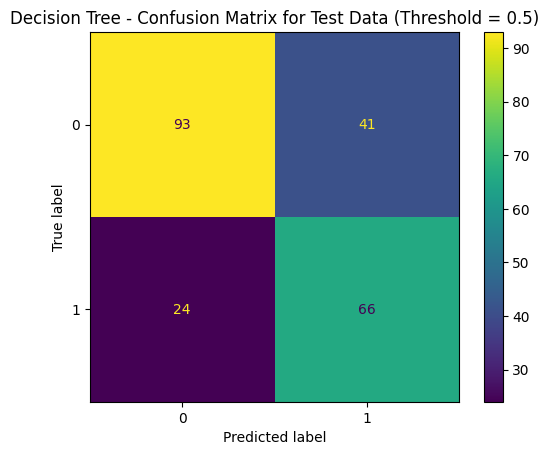

Threshold = 0.6
Accuracy: 0.7455, Precision: 0.6737, Recall: 0.7111, F1-score: 0.6919, ROC AUC: 0.7736
Confusion Matrix:
[[103  31]
 [ 26  64]]


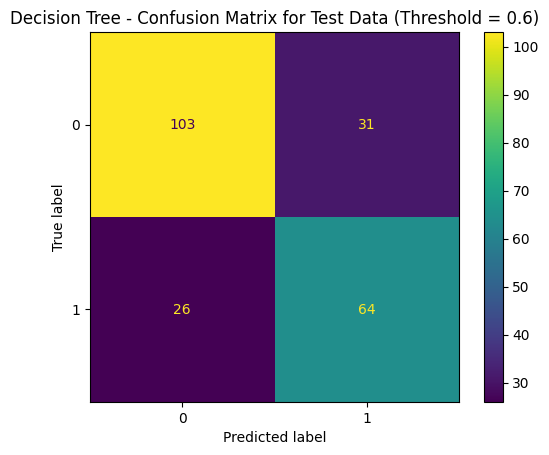

Threshold = 0.7
Accuracy: 0.7411, Precision: 0.7000, Recall: 0.6222, F1-score: 0.6588, ROC AUC: 0.7736
Confusion Matrix:
[[110  24]
 [ 34  56]]


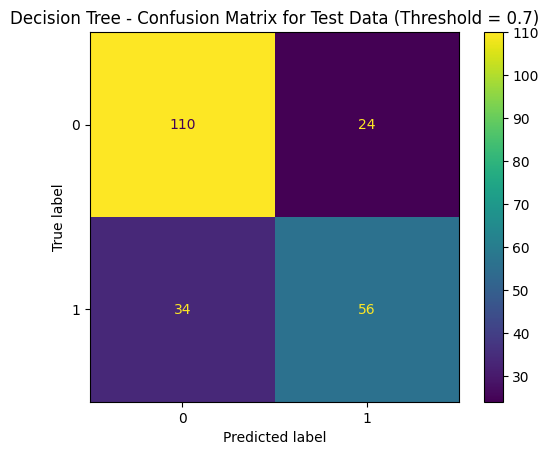

Threshold = 0.8
Accuracy: 0.7411, Precision: 0.7162, Recall: 0.5889, F1-score: 0.6463, ROC AUC: 0.7736
Confusion Matrix:
[[113  21]
 [ 37  53]]


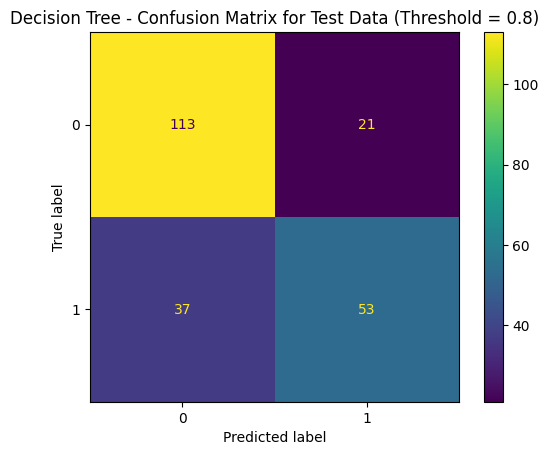

Threshold = 0.9
Accuracy: 0.7321, Precision: 0.7143, Recall: 0.5556, F1-score: 0.6250, ROC AUC: 0.7736
Confusion Matrix:
[[114  20]
 [ 40  50]]


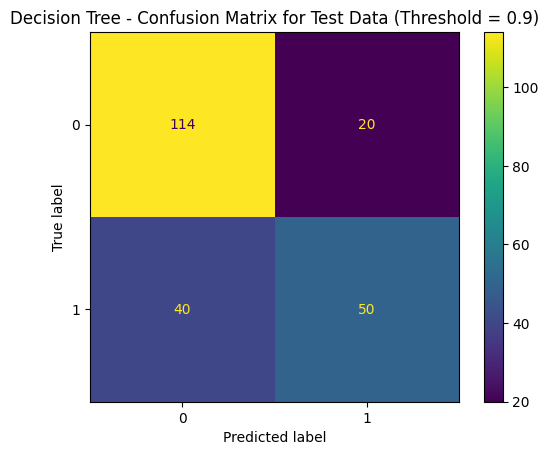

   Threshold  Accuracy  Precision    Recall  F1-score  ROC AUC
0        0.4  0.705357   0.611111  0.733333  0.666667  0.77359
1        0.5  0.709821   0.616822  0.733333  0.670051  0.77359
2        0.6  0.745536   0.673684  0.711111  0.691892  0.77359
3        0.7  0.741071   0.700000  0.622222  0.658824  0.77359
4        0.8  0.741071   0.716216  0.588889  0.646341  0.77359
5        0.9  0.732143   0.714286  0.555556  0.625000  0.77359


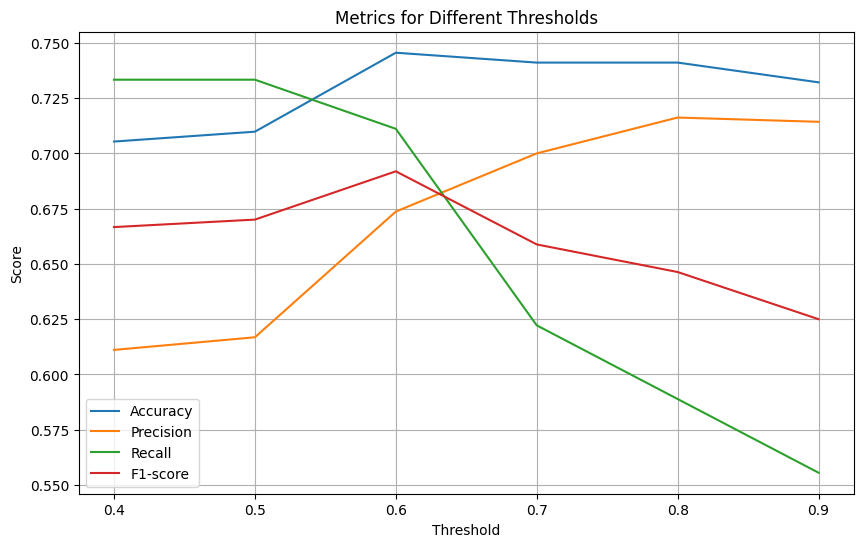

Best Threshold based on F1-score: 0.6


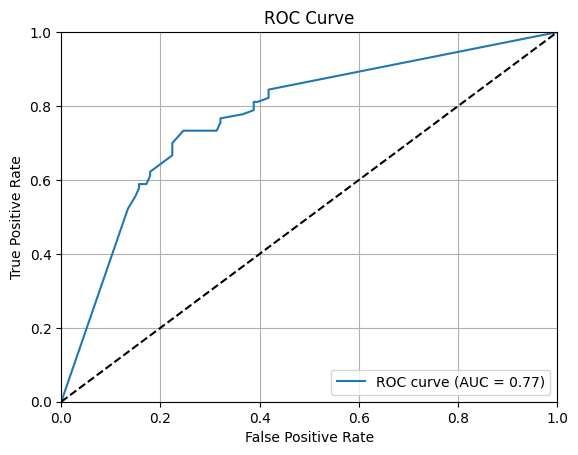

In [18]:
# Use custom thresholds to make predictions and calculate metrics
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_pred_proba = DT.predict_proba(test_X)[:, 1]

metrics_dict = {
    'Threshold': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'ROC AUC': []
}

roc_auc = roc_auc_score(test_y, y_pred_proba)

for threshold in thresholds:
    pred_y_test_custom = (y_pred_proba >= threshold).astype(int)

    # Calculate metrics using imported functions
    accuracy = accuracy_score(test_y, pred_y_test_custom)
    precision = precision_score(test_y, pred_y_test_custom)
    recall = recall_score(test_y, pred_y_test_custom)
    f1 = f1_score(test_y, pred_y_test_custom)

    metrics_dict['Threshold'].append(threshold)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1-score'].append(f1)
    metrics_dict['ROC AUC'].append(roc_auc)

    print(f"Threshold = {threshold}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    cm_test_custom = confusion_matrix(test_y, pred_y_test_custom)
    print(cm_test_custom)

    disp_test_custom = ConfusionMatrixDisplay(confusion_matrix=cm_test_custom)
    disp_test_custom.plot()
    plt.title(f'Decision Tree - Confusion Matrix for Test Data (Threshold = {threshold})')
    plt.show()

metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)

plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1-score'], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Metrics for Different Thresholds')
plt.legend()
plt.grid()
plt.show()

best_threshold = metrics_df.loc[metrics_df['F1-score'].idxmax(), 'Threshold']
print(f"Best Threshold based on F1-score: {best_threshold}")

# Plot the ROC curve for the best model
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
